# CNN

- 본 실습은 데이터 사전 준비가 필요합니다.
- 아래 캐글 컴피티션에서 동의 후 Dataset을 다운받기 바랍니다.
- https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge

In [1]:
# 라이브러리 불러오기
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

%matplotlib inline

In [2]:
import pandas as pd

In [3]:
#경로
path = "/content/drive/MyDrive/Colab Notebooks/youtube/퇴근후텐서플로/input/" 

# 데이터 불러오기
data = pd.read_csv(path+'icml_face_data.csv')
# icml_face_data 파일에 훈련용, 검증용, 테스트용 데이터가 포함됨

In [4]:
# 데이터 전처리 함수
def preprocessing(data):
    image = np.zeros(shape=(len(data), 48, 48)) # 빈 넘파이형태 (48*48)
    label = np.array(list(map(int, data['emotion']))) 
    for i, row in enumerate(data.index):
        df = np.fromstring(data[' pixels'][row], dtype=int, sep=' ') # 공백으로 구분된 데이터를 넘파이로 변경
        df = np.reshape(df, (48, 48)) 
        image[i] = df
    return image, label

In [5]:
# Train, Validation, Test 데이터 구분
x_train, y_train = preprocessing(data[data[' Usage']=='Training'])
x_val, y_val = preprocessing(data[data[' Usage']=='PrivateTest'])
x_test, y_test = preprocessing(data[data[' Usage']=='PublicTest'])

In [6]:
x_train.shape, x_val.shape, x_test.shape

((28709, 48, 48), (3589, 48, 48), (3589, 48, 48))

In [7]:
# 데이터 전처리(shape 변경)
print(x_train.shape, x_val.shape, x_test.shape)
x_train = x_train.reshape((x_train.shape[0], 48, 48, 1))
x_val = x_val.reshape((x_val.shape[0], 48, 48, 1))
x_test = x_test.reshape((x_test.shape[0], 48, 48, 1))
print(x_train.shape, x_val.shape, x_test.shape)

(28709, 48, 48) (3589, 48, 48) (3589, 48, 48)
(28709, 48, 48, 1) (3589, 48, 48, 1) (3589, 48, 48, 1)


In [8]:
x_train = x_train.astype('float32')/x_train.max()
x_val = x_val.astype('float32')/x_val.max()
x_test = x_test.astype('float32')/x_test.max()

## CNN 첫번째 모델

In [9]:
# 모델3 CNN 적용
model = Sequential([
                    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
                    MaxPooling2D((2, 2)),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(7, activation='softmax')
])
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3) 

# 훈련(학습)
history = model.fit(x_train, y_train,  validation_data=(x_val, y_val), epochs=30, batch_size=64, callbacks=[early_stopping]) 



Epoch 1/30
449/449 [==============================] - 35s 8ms/step - loss: 1.6762 - accuracy: 0.3462 - val_loss: 1.5288 - val_accuracy: 0.4154
Epoch 2/30
449/449 [==============================] - 4s 8ms/step - loss: 1.4710 - accuracy: 0.4420 - val_loss: 1.4435 - val_accuracy: 0.4450
Epoch 3/30
449/449 [==============================] - 4s 8ms/step - loss: 1.3691 - accuracy: 0.4812 - val_loss: 1.4058 - val_accuracy: 0.4639
Epoch 4/30
449/449 [==============================] - 4s 8ms/step - loss: 1.2878 - accuracy: 0.5156 - val_loss: 1.3932 - val_accuracy: 0.4759
Epoch 5/30
449/449 [==============================] - 4s 8ms/step - loss: 1.2126 - accuracy: 0.5464 - val_loss: 1.3824 - val_accuracy: 0.4712
Epoch 6/30
449/449 [==============================] - 4s 8ms/step - loss: 1.1446 - accuracy: 0.5781 - val_loss: 1.3500 - val_accuracy: 0.4923
Epoch 7/30
449/449 [==============================] - 4s 8ms/step - loss: 1.0784 - accuracy: 0.6022 - val_loss: 1.3622 - val_accuracy: 0.4954
Epoch

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4333696   
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 903       
Total params: 4,335,239
Trainable params: 4,335,239
Non-trainable params: 0
_________________________________________________________________


## CNN 두번째 모델

In [11]:
# CNN
img_height = 48
img_width = 48
ch = 1

model = Sequential([
                    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, ch)),
                    MaxPooling2D((2, 2)),
                    Conv2D(64, (3, 3), activation='relu'),
                    MaxPooling2D((2, 2)),
                    Conv2D(64, (3, 3), activation='relu'),
                    MaxPooling2D((2, 2)),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(7, activation='softmax')
])
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3) 

# 훈련(학습)
history = model.fit(x_train, y_train,  validation_data=(x_val, y_val), epochs=30, batch_size=64, callbacks=[early_stopping]) 

Epoch 1/30
449/449 [==============================] - 4s 7ms/step - loss: 1.6585 - accuracy: 0.3428 - val_loss: 1.5011 - val_accuracy: 0.4205
Epoch 2/30
449/449 [==============================] - 3s 7ms/step - loss: 1.4319 - accuracy: 0.4544 - val_loss: 1.4133 - val_accuracy: 0.4572
Epoch 3/30
449/449 [==============================] - 3s 7ms/step - loss: 1.3189 - accuracy: 0.4986 - val_loss: 1.2900 - val_accuracy: 0.5049
Epoch 4/30
449/449 [==============================] - 3s 7ms/step - loss: 1.2424 - accuracy: 0.5299 - val_loss: 1.2721 - val_accuracy: 0.5130
Epoch 5/30
449/449 [==============================] - 3s 7ms/step - loss: 1.1862 - accuracy: 0.5497 - val_loss: 1.2372 - val_accuracy: 0.5297
Epoch 6/30
449/449 [==============================] - 3s 7ms/step - loss: 1.1316 - accuracy: 0.5747 - val_loss: 1.2005 - val_accuracy: 0.5391
Epoch 7/30
449/449 [==============================] - 3s 7ms/step - loss: 1.0798 - accuracy: 0.5947 - val_loss: 1.1849 - val_accuracy: 0.5522
Epoch 

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)             

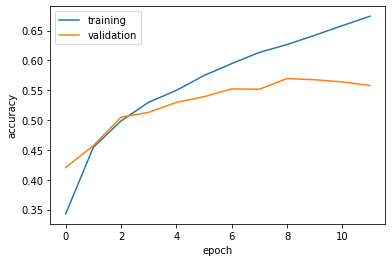

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'])

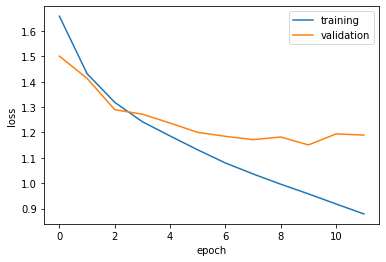

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'])

In [15]:
loss, acc = model.evaluate(x_test, y_test)
print('test정확도:', acc)

113/113 [==============================] - 0s 3ms/step - loss: 1.2295 - accuracy: 0.5464
test정확도: 0.5463917255401611
